In [1]:
import numpy as np
import pandas as pd
import psix
import os

from matplotlib import pyplot as plt

from scipy.special import expit, logit

from scipy.special import logit, expit
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc


In [2]:
platonic_psi = pd.read_csv('sim_output/psi_platonic.tab', sep='\t', 
                               names = ['cell_'+str(i+1) for i in range(10000)])
platonic_psi.index = ['gene' + str(i+1) for i in range(5000)]

platonic_psi = expit(platonic_psi)

delta_psi = platonic_psi.max(axis=1) - platonic_psi.min(axis=1)
diff_psi = delta_psi >= 0.2
pos_exons = diff_psi.loc[diff_psi].index
neg_exons = diff_psi.loc[~diff_psi].index

0.9775100380245845


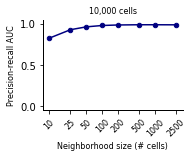

In [9]:
psix_10 = pd.read_csv('psix_output_10000/k_number/k_10.tab.gz', sep='\t', index_col=0)
psix_25 = pd.read_csv('psix_output_10000/k_number/k_25.tab.gz', sep='\t', index_col=0)
psix_50 = pd.read_csv('psix_output_10000/k_number/k_50.tab.gz', sep='\t', index_col=0)
psix_100 = pd.read_csv('psix_output_10000/k_number/k_100.tab.gz', sep='\t', index_col=0)
psix_200 = pd.read_csv('psix_output_10000/k_number/k_200.tab.gz', sep='\t', index_col=0)
psix_500 = pd.read_csv('psix_output_10000/k_number/k_500.tab.gz', sep='\t', index_col=0)
psix_1000 = pd.read_csv('psix_output_10000/k_number/k_1000.tab.gz', sep='\t', index_col=0)
psix_2500 = pd.read_csv('psix_output_10000/k_number/k_2500.tab.gz', sep='\t', index_col=0)

recall_list = []
for x in [psix_10, psix_25, psix_50, psix_100, psix_200, psix_500, psix_1000, psix_2500]:
    
    idx = x.index

    pos = pos_exons.intersection(idx)
    neg = neg_exons.intersection(idx)
    
    new_idx = list(pos) + list(neg)

    y = [1]*len(pos) + [0]*len(neg)
    
    pre, rec, thres = precision_recall_curve(y, x.loc[new_idx].psix_score)
    
    recall_list.append(auc(rec, pre))


fig = plt.figure(figsize=(6/2.4, 4/2.4))
ax = fig.add_subplot(111)

# ax.plot([10, 10], [0, recall_list[3]], linestyle='--', c='gray')

ax.scatter(np.log10(np.array([10, 25, 50, 100, 200, 500, 1000, 2500])), recall_list, c='navy', zorder=20, s=20)

ax.plot(np.log10(np.array([10, 25, 50, 100, 200, 500, 1000, 2500])), recall_list, c='navy', zorder=20)

ax.set_xticks(np.log10(np.array([10, 25, 50, 100, 200, 500, 1000, 2500])))

ax.set_xticklabels(['10', '25', '50', '100', '200', '500', '1000', '2500'], size=8, rotation = 45)

ax.set_xlabel('Neighborhood size (# cells)', size=8)

# ax.set_yticks([0.0, 0.5, 1])
# ax.set_yticklabels(['0', '0.5', '1'], size=8)
ax.set_ylabel('Precision-recall AUC', size=8)
ax.set_title('10,000 cells', size=8)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_ylim([-0.05, 1.05])
# plt.show()
plt.savefig('../plots/single_lineage_knumber_10000_auc.png', bbox_inches='tight', res=20000, dpi =2000)


##########################

idx = psix_100.index

pos = pos_exons.intersection(idx)
neg = neg_exons.intersection(idx)

new_idx = list(pos) + list(neg)

y = [1]*len(pos) + [0]*len(neg)

pre, rec, thres = precision_recall_curve(y, psix_100.loc[new_idx].psix_score)
    
print(auc(rec, pre))

0.9722456735638345


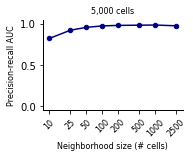

In [10]:
psix_10 = pd.read_csv('psix_output_5000/k_number/k_10.tab.gz', sep='\t', index_col=0)
psix_25 = pd.read_csv('psix_output_5000/k_number/k_25.tab.gz', sep='\t', index_col=0)
psix_50 = pd.read_csv('psix_output_5000/k_number/k_50.tab.gz', sep='\t', index_col=0)
psix_100 = pd.read_csv('psix_output_5000/k_number/k_100.tab.gz', sep='\t', index_col=0)
psix_200 = pd.read_csv('psix_output_5000/k_number/k_200.tab.gz', sep='\t', index_col=0)
psix_500 = pd.read_csv('psix_output_5000/k_number/k_500.tab.gz', sep='\t', index_col=0)
psix_1000 = pd.read_csv('psix_output_5000/k_number/k_1000.tab.gz', sep='\t', index_col=0)
psix_2500 = pd.read_csv('psix_output_5000/k_number/k_2500.tab.gz', sep='\t', index_col=0)

recall_list = []
for x in [psix_10, psix_25, psix_50, psix_100, psix_200, psix_500, psix_1000, psix_2500]:
    
    idx = x.index

    pos = pos_exons.intersection(idx)
    neg = neg_exons.intersection(idx)
    
    new_idx = list(pos) + list(neg)

    y = [1]*len(pos) + [0]*len(neg)
    
    pre, rec, thres = precision_recall_curve(y, x.loc[new_idx].psix_score)
    
    recall_list.append(auc(rec, pre))


fig = plt.figure(figsize=(6/2.4, 4/2.4))
ax = fig.add_subplot(111)

# ax.plot([10, 10], [0, recall_list[3]], linestyle='--', c='gray')

ax.scatter(np.log10(np.array([10, 25, 50, 100, 200, 500, 1000, 2500])), recall_list, c='navy', zorder=20, s=20)

ax.plot(np.log10(np.array([10, 25, 50, 100, 200, 500, 1000, 2500])), recall_list, c='navy', zorder=20)

ax.set_xticks(np.log10(np.array([10, 25, 50, 100, 200, 500, 1000, 2500])))

ax.set_xticklabels(['10', '25', '50', '100', '200', '500', '1000', '2500'], size=8, rotation = 45)

ax.set_xlabel('Neighborhood size (# cells)', size=8)

# ax.set_yticks([0.0, 0.5, 1])
# ax.set_yticklabels(['0', '0.5', '1'], size=8)
ax.set_ylabel('Precision-recall AUC', size=8)
ax.set_title('5,000 cells', size=8)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_ylim([-0.05, 1.05])
plt.savefig('../plots/single_lineage_knumber_5000_auc.png', bbox_inches='tight', res=20000, dpi =2000)
# plt.savefig('../plots/single_lineage_kauc.png', bbox_inches='tight', res=20000, dpi =2000)

##################

idx = psix_100.index

pos = pos_exons.intersection(idx)
neg = neg_exons.intersection(idx)

new_idx = list(pos) + list(neg)

y = [1]*len(pos) + [0]*len(neg)

pre, rec, thres = precision_recall_curve(y, psix_100.loc[new_idx].psix_score)
    
print(auc(rec, pre))

0.9406590365421839


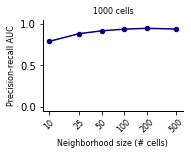

In [11]:
psix_10 = pd.read_csv('psix_output_1000/k_number/k_10.tab.gz', sep='\t', index_col=0)
psix_25 = pd.read_csv('psix_output_1000/k_number/k_25.tab.gz', sep='\t', index_col=0)
psix_50 = pd.read_csv('psix_output_1000/k_number/k_50.tab.gz', sep='\t', index_col=0)
psix_100 = pd.read_csv('psix_output_1000/k_number/k_100.tab.gz', sep='\t', index_col=0)
psix_200 = pd.read_csv('psix_output_1000/k_number/k_200.tab.gz', sep='\t', index_col=0)
psix_500 = pd.read_csv('psix_output_1000/k_number/k_500.tab.gz', sep='\t', index_col=0)

recall_list = []
for x in [psix_10, psix_25, psix_50, psix_100, psix_200, psix_500]:
    
    idx = x.index

    pos = pos_exons.intersection(idx)
    neg = neg_exons.intersection(idx)
    
    new_idx = list(pos) + list(neg)

    y = [1]*len(pos) + [0]*len(neg)
    
    pre, rec, thres = precision_recall_curve(y, x.loc[new_idx].psix_score)
    
    recall_list.append(auc(rec, pre))


fig = plt.figure(figsize=(6/2.4, 4/2.4))
ax = fig.add_subplot(111)

# ax.plot([10, 10], [0, recall_list[3]], linestyle='--', c='gray')

ax.scatter(np.log10(np.array([10, 25, 50, 100, 200, 500])), recall_list, c='navy', zorder=20, s=20)

ax.plot(np.log10(np.array([10, 25, 50, 100, 200, 500])), recall_list, c='navy', zorder=20)

ax.set_xticks(np.log10(np.array([10, 25, 50, 100, 200, 500])))

ax.set_xticklabels(['10', '25', '50', '100', '200', '500'], size=8, rotation = 45)

ax.set_xlabel('Neighborhood size (# cells)', size=8)

# ax.set_yticks([0.0, 0.5, 1])
# ax.set_yticklabels(['0', '0.5', '1'], size=8)
ax.set_ylabel('Precision-recall AUC', size=8)
ax.set_title('1000 cells', size=8)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_ylim([-0.05, 1.05])
plt.savefig('../plots/single_lineage_knumber_1000_auc.png', bbox_inches='tight', res=20000, dpi =2000)
# plt.savefig('../plots/single_lineage_kauc.png', bbox_inches='tight', res=20000, dpi =2000)
##############################

idx = psix_100.index

pos = pos_exons.intersection(idx)
neg = neg_exons.intersection(idx)

new_idx = list(pos) + list(neg)

y = [1]*len(pos) + [0]*len(neg)

pre, rec, thres = precision_recall_curve(y, psix_100.loc[new_idx].psix_score)
    
print(auc(rec, pre))

0.9132557517728129


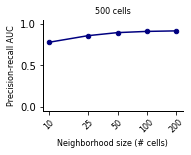

In [12]:
psix_10 = pd.read_csv('psix_output_500/k_number/k_10.tab.gz', sep='\t', index_col=0)
psix_25 = pd.read_csv('psix_output_500/k_number/k_25.tab.gz', sep='\t', index_col=0)
psix_50 = pd.read_csv('psix_output_500/k_number/k_50.tab.gz', sep='\t', index_col=0)
psix_100 = pd.read_csv('psix_output_500/k_number/k_100.tab.gz', sep='\t', index_col=0)
psix_200 = pd.read_csv('psix_output_500/k_number/k_200.tab.gz', sep='\t', index_col=0)

recall_list = []
for x in [psix_10, psix_25, psix_50, psix_100, psix_200]:
    
    idx = x.index

    pos = pos_exons.intersection(idx)
    neg = neg_exons.intersection(idx)
    
    new_idx = list(pos) + list(neg)

    y = [1]*len(pos) + [0]*len(neg)
    
    pre, rec, thres = precision_recall_curve(y, x.loc[new_idx].psix_score)
    
    recall_list.append(auc(rec, pre))


fig = plt.figure(figsize=(6/2.4, 4/2.4))
ax = fig.add_subplot(111)

# ax.plot([10, 10], [0, recall_list[3]], linestyle='--', c='gray')

ax.scatter(np.log10(np.array([10, 25, 50, 100, 200])), recall_list, c='navy', zorder=20, s=20)

ax.plot(np.log10(np.array([10, 25, 50, 100, 200])), recall_list, c='navy', zorder=20)

ax.set_xticks(np.log10(np.array([10, 25, 50, 100, 200])))

ax.set_xticklabels(['10', '25', '50', '100', '200'], size=8, rotation = 45)

ax.set_xlabel('Neighborhood size (# cells)', size=8)

# ax.set_yticks([0.0, 0.5, 1])
# ax.set_yticklabels(['0', '0.5', '1'], size=8)
ax.set_ylabel('Precision-recall AUC', size=8)
ax.set_title('500 cells', size=8)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_ylim([-0.05, 1.05])
plt.savefig('../plots/single_lineage_knumber_500_auc.png', bbox_inches='tight', res=20000, dpi =2000)
# plt.savefig('../plots/single_lineage_kauc.png', bbox_inches='tight', res=20000, dpi =2000)
##############################

idx = psix_100.index

pos = pos_exons.intersection(idx)
neg = neg_exons.intersection(idx)

new_idx = list(pos) + list(neg)

y = [1]*len(pos) + [0]*len(neg)

pre, rec, thres = precision_recall_curve(y, psix_100.loc[new_idx].psix_score)
    
print(auc(rec, pre))

0.8985893547806818


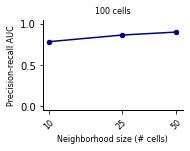

In [13]:
psix_10 = pd.read_csv('psix_output_500/k_number/k_10.tab.gz', sep='\t', index_col=0)
psix_25 = pd.read_csv('psix_output_500/k_number/k_25.tab.gz', sep='\t', index_col=0)
psix_50 = pd.read_csv('psix_output_500/k_number/k_50.tab.gz', sep='\t', index_col=0)

recall_list = []
for x in [psix_10, psix_25, psix_50]:
    
    idx = x.index

    pos = pos_exons.intersection(idx)
    neg = neg_exons.intersection(idx)
    
    new_idx = list(pos) + list(neg)

    y = [1]*len(pos) + [0]*len(neg)
    
    pre, rec, thres = precision_recall_curve(y, x.loc[new_idx].psix_score)
    
    recall_list.append(auc(rec, pre))


fig = plt.figure(figsize=(6/2.4, 4/2.4))
ax = fig.add_subplot(111)

# ax.plot([10, 10], [0, recall_list[3]], linestyle='--', c='gray')

ax.scatter(np.log10(np.array([10, 25, 50])), recall_list, c='navy', zorder=20, s=20)

ax.plot(np.log10(np.array([10, 25, 50])), recall_list, c='navy', zorder=20)

ax.set_xticks(np.log10(np.array([10, 25, 50])))

ax.set_xticklabels(['10', '25', '50'], size=8, rotation = 45)

ax.set_xlabel('Neighborhood size (# cells)', size=8)

# ax.set_yticks([0.0, 0.5, 1])
# ax.set_yticklabels(['0', '0.5', '1'], size=8)
ax.set_ylabel('Precision-recall AUC', size=8)
ax.set_title('100 cells', size=8)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_ylim([-0.05, 1.05])
plt.savefig('../plots/single_lineage_knumber_100_auc.png', bbox_inches='tight', res=20000, dpi =2000)
# plt.savefig('../plots/single_lineage_kauc.png', bbox_inches='tight', res=20000, dpi =2000)
##############################

idx = psix_100.index

pos = pos_exons.intersection(idx)
neg = neg_exons.intersection(idx)

new_idx = list(pos) + list(neg)

y = [1]*len(pos) + [0]*len(neg)

pre, rec, thres = precision_recall_curve(y, psix_50.loc[new_idx].psix_score)
    
print(auc(rec, pre))

## Compare # of cells

In [3]:
psix_10000 = pd.read_csv('psix_output_10000/k_number/k_100.tab.gz', sep='\t', index_col=0)
psix_5000 = pd.read_csv('psix_output_5000/k_number/k_100.tab.gz', sep='\t', index_col=0)
psix_1000 = pd.read_csv('psix_output_1000/k_number/k_100.tab.gz', sep='\t', index_col=0)
psix_500 = pd.read_csv('psix_output_500/k_number/k_100.tab.gz', sep='\t', index_col=0)
psix_100 = pd.read_csv('psix_output_100/k_number/k_50.tab.gz', sep='\t', index_col=0)


In [4]:
def get_stats(psix_output, pos_exons, neg_exons):

    idx = psix_output.index

    pos = pos_exons.intersection(idx)
    neg = neg_exons.intersection(idx)
    
    new_idx = list(pos) + list(neg)

    labels_ = [1]*len(pos) + [0]*len(neg)
    
    results_ = psix_output.loc[new_idx].qvals <= 0.05
    
    return recall_score(labels_, results_), precision_score(labels_, results_), f1_score(labels_, results_)


def get_auc(psix_output, pos_exons, neg_exons):

    idx = psix_output.index

    pos = pos_exons.intersection(idx)
    neg = neg_exons.intersection(idx)
    
    new_idx = list(pos) + list(neg)

    labels_ = [1]*len(pos) + [0]*len(neg)
    
    results_ = psix_output.loc[new_idx].psix_score
    
    pre, rec, thres = precision_recall_curve(labels_, results_)
    
    return auc(rec, pre)


In [5]:
get_auc(psix_500, pos_exons, neg_exons)

0.9132557517728129

In [6]:
tpm = pd.read_csv('processed_tables/tpm_0.1.tab.gz', sep='\t', index_col=0)

In [18]:
idx = psix_1000.index
q = int(len(idx)/4)
exp_1 = np.log1p(tpm.loc[idx]).mean(axis=1).sort_values().index[:q]
exp_2 = np.log1p(tpm.loc[idx]).mean(axis=1).sort_values().index[q:2*q]
exp_3 = np.log1p(tpm.loc[idx]).mean(axis=1).sort_values().index[2*q:3*q]
exp_4 = np.log1p(tpm.loc[idx]).mean(axis=1).sort_values().index[3*q:]


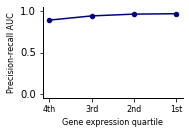

In [19]:
gene_strat = [get_auc(psix_1000, pos_exons.intersection(exp_1), neg_exons.intersection(exp_1)),
              get_auc(psix_1000, pos_exons.intersection(exp_2), neg_exons.intersection(exp_2)),
              get_auc(psix_1000, pos_exons.intersection(exp_3), neg_exons.intersection(exp_3)),
              get_auc(psix_1000, pos_exons.intersection(exp_4), neg_exons.intersection(exp_4))]


fig = plt.figure(figsize=(6/2.4, 4/2.4))
ax = fig.add_subplot(111)
ax.scatter(np.array([1, 2, 3, 4]), gene_strat, c='navy', zorder=20, s=20)
ax.plot(np.array([1, 2, 3, 4]), gene_strat, c='navy', zorder=20)
ax.set_xticks(np.array([1, 2, 3, 4]))
ax.set_xticklabels(['4th', '3rd', '2nd', '1st'], size=8)
ax.set_xlabel('Gene expression quartile', size=8)
ax.set_ylabel('Precision-recall AUC', size=8)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_ylim([-0.05, 1.05])
# ax.set_xlim([0.5, 4.5])
plt.savefig('../plots/single_lineage_exp_quartiles_1000_auc.png', bbox_inches='tight', res=20000, dpi =2000)
# plt.savefig('../pl

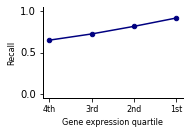

In [20]:
gene_strat = [get_stats(psix_1000, pos_exons.intersection(exp_1), neg_exons.intersection(exp_1))[0],
              get_stats(psix_1000, pos_exons.intersection(exp_2), neg_exons.intersection(exp_2))[0],
              get_stats(psix_1000, pos_exons.intersection(exp_3), neg_exons.intersection(exp_3))[0],
              get_stats(psix_1000, pos_exons.intersection(exp_4), neg_exons.intersection(exp_4))[0]]


fig = plt.figure(figsize=(6/2.4, 4/2.4))
ax = fig.add_subplot(111)
ax.scatter(np.array([1, 2, 3, 4]), gene_strat, c='navy', zorder=20, s=20)
ax.plot(np.array([1, 2, 3, 4]), gene_strat, c='navy', zorder=20)
ax.set_xticks(np.array([1, 2, 3, 4]))
ax.set_xticklabels(['4th', '3rd', '2nd', '1st'], size=8)
ax.set_xlabel('Gene expression quartile', size=8)
ax.set_ylabel('Recall', size=8)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_ylim([-0.05, 1.05])
# ax.set_xlim([0.5, 4.5])
plt.savefig('../plots/single_lineage_exp_quartiles_1000_recall.png', bbox_inches='tight', res=20000, dpi =2000)
# plt.savefig('../pl

In [134]:
get_auc(psix_1000, pos_exons.intersection(exp_3), neg_exons.intersection(exp_3))

0.9660131387189022

In [135]:
get_auc(psix_1000, pos_exons.intersection(exp_4), neg_exons.intersection(exp_4))

0.9709765968231772

In [21]:
recall = []
precision = [] 
f1 = []

r, p, f = get_stats(psix_100, pos_exons, neg_exons)
recall.append(r)
precision.append(p)
f1.append(f)

r, p, f = get_stats(psix_500, pos_exons, neg_exons)
recall.append(r)
precision.append(p)
f1.append(f)

r, p, f = get_stats(psix_1000, pos_exons, neg_exons)
recall.append(r)
precision.append(p)
f1.append(f)

r, p, f = get_stats(psix_5000, pos_exons, neg_exons)
recall.append(r)
precision.append(p)
f1.append(f)

r, p, f = get_stats(psix_10000, pos_exons, neg_exons)
recall.append(r)
precision.append(p)
f1.append(f)

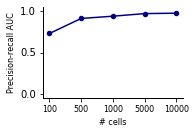

In [22]:
pr_auc = []

pr_auc.append(get_auc(psix_100, pos_exons, neg_exons))
pr_auc.append(get_auc(psix_500, pos_exons, neg_exons))
pr_auc.append(get_auc(psix_1000, pos_exons, neg_exons))
pr_auc.append(get_auc(psix_5000, pos_exons, neg_exons))
pr_auc.append(get_auc(psix_10000, pos_exons, neg_exons))

fig = plt.figure(figsize=(6/2.4, 4/2.4))
ax = fig.add_subplot(111)
ax.scatter(range(5), pr_auc, c='navy', zorder=20, s=20)
ax.plot(range(5), pr_auc, c='navy', zorder=20)
ax.set_xticks(range(5))
ax.set_xticklabels(['100', '500', '1000', '5000', '10000'], size=8)
ax.set_xlabel('# cells', size=8)
ax.set_ylabel('Precision-recall AUC', size=8)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_ylim([-0.05, 1.05])
plt.savefig('../plots/single_lineage_cells_auc.png', bbox_inches='tight', res=20000, dpi =2000)


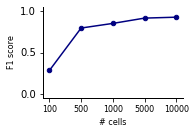

In [23]:
fig = plt.figure(figsize=(6/2.4, 4/2.4))
ax = fig.add_subplot(111)
ax.scatter(range(5), f1, c='navy', zorder=20, s=20)
ax.plot(range(5), f1, c='navy', zorder=20)
ax.set_xticks(range(5))
ax.set_xticklabels(['100', '500', '1000', '5000', '10000'], size=8)
ax.set_xlabel('# cells', size=8)
ax.set_ylabel('F1 score', size=8)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_ylim([-0.05, 1.05])
plt.savefig('../plots/single_lineage_cells_f1.png', bbox_inches='tight', res=20000, dpi =2000)


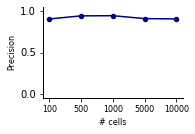

In [24]:
fig = plt.figure(figsize=(6/2.4, 4/2.4))
ax = fig.add_subplot(111)
ax.scatter(range(5), precision, c='navy', zorder=20, s=20)
ax.plot(range(5), precision, c='navy', zorder=20)
ax.set_xticks(range(5))
ax.set_xticklabels(['100', '500', '1000', '5000', '10000'], size=8)
ax.set_xlabel('# cells', size=8)
ax.set_ylabel('Precision', size=8)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_ylim([-0.05, 1.05])
plt.savefig('../plots/single_lineage_cells_pre.png', bbox_inches='tight', res=20000, dpi =2000)


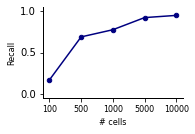

In [25]:
fig = plt.figure(figsize=(6/2.4, 4/2.4))
ax = fig.add_subplot(111)
ax.scatter(range(5), recall, c='navy', zorder=20, s=20)
ax.plot(range(5), recall, c='navy', zorder=20)
ax.set_xticks(range(5))
ax.set_xticklabels(['100', '500', '1000', '5000', '10000'], size=8)
ax.set_xlabel('# cells', size=8)
ax.set_ylabel('Recall', size=8)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_ylim([-0.05, 1.05])
plt.savefig('../plots/single_lineage_cells_rec.png', bbox_inches='tight', res=20000, dpi =2000)


In [26]:
deltaPSI = platonic_psi.max(axis=1) - platonic_psi.min(axis=1)
deltaPSI = deltaPSI.loc[psix_1000.index]

In [27]:
bin_0 = deltaPSI.loc[(deltaPSI <= 0.01)].index
bin_0_20 = deltaPSI.loc[(deltaPSI > 0.01) & (deltaPSI <= 0.2)].index
bin_20_40 = deltaPSI.loc[(deltaPSI > 0.2) & (deltaPSI <= 0.4)].index
bin_40_60 = deltaPSI.loc[(deltaPSI > 0.4) & (deltaPSI <= 0.6)].index
bin_60_80 = deltaPSI.loc[(deltaPSI > 0.6) & (deltaPSI <= 0.8)].index
bin_80 = deltaPSI.loc[(deltaPSI > 0.8)].index

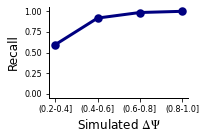

In [28]:
def get_recall(predict, exon_bin):
    return recall_score(([True]*len(exon_bin)), predict.loc[[str(x) for x in exon_bin]])


def get_precision(predict, exon_bin):
    return precision_score(([True]*len(exon_bin)), predict.loc[[str(x) for x in exon_bin]])

fig = plt.figure(figsize=(6/2.4, 4/2.4))
ax = fig.add_subplot(111)

plt.plot([ 0.4, 0.6, 0.8, 1.0],
     [#get_recall((psix_1000.qvals <= 0.05), bin_0_20),
      get_recall((psix_1000.qvals <= 0.05), bin_20_40),
      get_recall((psix_1000.qvals <= 0.05), bin_40_60),
      get_recall((psix_1000.qvals <= 0.05), bin_60_80),
      get_recall((psix_1000.qvals <= 0.05), bin_80)],
        c='navy', linewidth=3)

plt.scatter([ 0.4, 0.6, 0.8, 1.0],
     [#get_recall((psix_1000.qvals <= 0.05), bin_0_20),
      get_recall((psix_1000.qvals <= 0.05), bin_20_40),
      get_recall((psix_1000.qvals <= 0.05), bin_40_60),
      get_recall((psix_1000.qvals <= 0.05), bin_60_80),
      get_recall((psix_1000.qvals <= 0.05), bin_80)],
            s=30, c='navy', linewidth=3)

plt.xlabel(r'Simulated $\Delta \Psi$', fontsize=12)
plt.ylabel('Recall', fontsize=12)
ax.set_xticks([ 0.4, 0.6, 0.8, 1.0])
ax.set_xticklabels(['(0.2-0.4]', '(0.4-0.6]', '(0.6-0.8]', '(0.8-1.0]'])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.ylim([-0.05, 1.05])

ax.tick_params(axis='both', which='major', labelsize=8)
plt.savefig('../plots/delta_psi_psix_recall.png', bbox_inches='tight', res=20000, dpi =2000)
# plt.show()

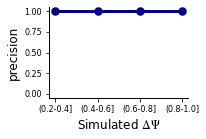

In [30]:
# def get_precision(predict, exon_bin):
#     return precision_score(([True]*len(exon_bin)), predict.loc[[str(x) for x in exon_bin]])


# def get_precision(predict, deltaPSI, cutoff):
#     delta_pos = [str(x) for x in deltaPSI.loc[deltaPSI >= cutoff].index]
#     delta_neg = [str(x) for x in deltaPSI.loc[deltaPSI < 0.01].index]
    
#     delta_y = [True]*len(delta_pos) + [False]*len(delta_neg)
    
#     print(len(delta_y))
    
#     return precision_score(delta_y, predict.loc[delta_pos + delta_neg])

fig = plt.figure(figsize=(6/2.4, 4/2.4))
ax = fig.add_subplot(111)

plt.plot([ 0.4, 0.6, 0.8, 1.0],
     [#get_precision((psix_1000.qvals <= 0.05), bin_0_20),
      get_precision((psix_1000.qvals <= 0.05), bin_20_40),
      get_precision((psix_1000.qvals <= 0.05), bin_40_60),
      get_precision((psix_1000.qvals <= 0.05), bin_60_80),
      get_precision((psix_1000.qvals <= 0.05), bin_80)],
        c='navy', linewidth=3)

plt.scatter([ 0.4, 0.6, 0.8, 1.0],
     [#get_precision((psix_1000.qvals <= 0.05), bin_0_20),
      get_precision((psix_1000.qvals <= 0.05), bin_20_40),
      get_precision((psix_1000.qvals <= 0.05), bin_40_60),
      get_precision((psix_1000.qvals <= 0.05), bin_60_80),
      get_precision((psix_1000.qvals <= 0.05), bin_80)],
            s=30, c='navy', linewidth=3)

plt.xlabel(r'Simulated $\Delta \Psi$', fontsize=12)
plt.ylabel('precision', fontsize=12)
ax.set_xticks([ 0.4, 0.6, 0.8, 1.0])
ax.set_xticklabels(['(0.2-0.4]', '(0.4-0.6]', '(0.6-0.8]', '(0.8-1.0]'])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.ylim([-0.05, 1.05])

ax.tick_params(axis='both', which='major', labelsize=8)
# plt.savefig('../plots/delta_psi_psix_precision.png', bbox_inches='tight', res=20000, dpi =2000)
plt.savefig('../plots/delta_psi_psix_precision.png', bbox_inches='tight', res=20000, dpi =2000)


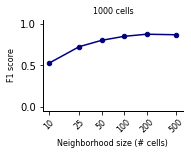

0.9406590365421839


In [156]:
psix_10 = pd.read_csv('psix_output_1000/k_number/k_10.tab.gz', sep='\t', index_col=0)
psix_25 = pd.read_csv('psix_output_1000/k_number/k_25.tab.gz', sep='\t', index_col=0)
psix_50 = pd.read_csv('psix_output_1000/k_number/k_50.tab.gz', sep='\t', index_col=0)
psix_100 = pd.read_csv('psix_output_1000/k_number/k_100.tab.gz', sep='\t', index_col=0)
psix_200 = pd.read_csv('psix_output_1000/k_number/k_200.tab.gz', sep='\t', index_col=0)
psix_500 = pd.read_csv('psix_output_1000/k_number/k_500.tab.gz', sep='\t', index_col=0)

recall_list = []
for x in [psix_10, psix_25, psix_50, psix_100, psix_200, psix_500]:
    
    idx = x.index

    pos = pos_exons.intersection(idx)
    neg = neg_exons.intersection(idx)
    
    new_idx = list(pos) + list(neg)

    y = [1]*len(pos) + [0]*len(neg)
    
#     pre, rec, thres = precision_recall_curve(y, x.loc[new_idx].psix_score)
    
    r, p, f = get_stats(x, pos, neg)
#     recall.append(r)
#     precision.append(p)
#     f1.append(f)
    
    recall_list.append(f)


fig = plt.figure(figsize=(6/2.4, 4/2.4))
ax = fig.add_subplot(111)

# ax.plot([10, 10], [0, recall_list[3]], linestyle='--', c='gray')

ax.scatter(np.log10(np.array([10, 25, 50, 100, 200, 500])), recall_list, c='navy', zorder=20, s=20)

ax.plot(np.log10(np.array([10, 25, 50, 100, 200, 500])), recall_list, c='navy', zorder=20)

ax.set_xticks(np.log10(np.array([10, 25, 50, 100, 200, 500])))

ax.set_xticklabels(['10', '25', '50', '100', '200', '500'], size=8, rotation = 45)

ax.set_xlabel('Neighborhood size (# cells)', size=8)

# ax.set_yticks([0.0, 0.5, 1])
# ax.set_yticklabels(['0', '0.5', '1'], size=8)
ax.set_ylabel('F1 score', size=8)
ax.set_title('1000 cells', size=8)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_ylim([-0.05, 1.05])
plt.show()
# plt.savefig('../plots/single_lineage_kauc.png', bbox_inches='tight', res=20000, dpi =2000)
##############################

idx = psix_100.index

pos = pos_exons.intersection(idx)
neg = neg_exons.intersection(idx)

new_idx = list(pos) + list(neg)

y = [1]*len(pos) + [0]*len(neg)

pre, rec, thres = precision_recall_curve(y, psix_100.loc[new_idx].psix_score)
    
print(auc(rec, pre))